![Judge Research](images/judgeresearch.png)

# Judge Research Feature Tutorial
## Setup
Import classes which handle the connection, authentication, and transactions with Judge Research and Coinalytix

In [16]:
# import classes that handle API connections and parameters
from historical_data import Coinalytix, HDParams
from judgeresearch import JudgeResearch, JRParams

# import classes for data handling & visiualization
import json
import plotly.graph_objects as go
import pandas as pd
from datetime import datetime
import pandas_ta as ta
from watchlist import colors

# instantiate our classes
asset = HDParams()
jrparams = JRParams()
HD = Coinalytix()
JR = JudgeResearch()

## Authenticate
Enter your API keys here:

In [17]:
CA_API_KEY = "<paste your coinalytix.io key here>"
JR_API_KEY = "hHV1QUTclB653YLvFJBJh5Pz0BayF251at64c9x9"

## Configure Assets
Define the parameters for your historical data:

In [18]:
# Set exchange, must be "BINANCE" or ...
asset.exchange = "BINANCE"

# Set asset, currently supports "BTC-USD-SPOT", "ETH-USD-SPOT", ...
asset.ticker = "BTC-USD-SPOT"

# Set start of reporting period in form YYYY-MM-DD HH:MM:SS
# Dates after 2019...? supported
asset.set_start_date("2021-01-01 08:00:00")
                     
# Set reporting interval, currently supports "1d", "1m"...
asset.interval = "1d"
                     
# Set number of reporting periods                    
asset.num_periods = 365

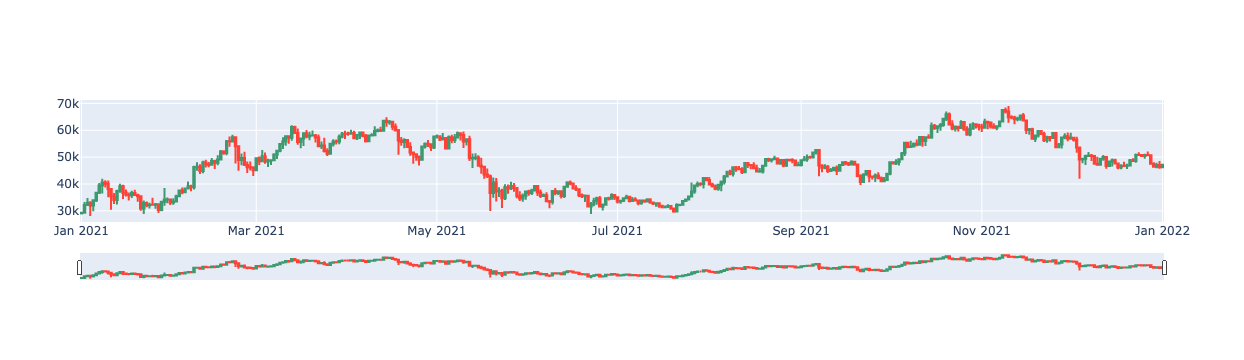

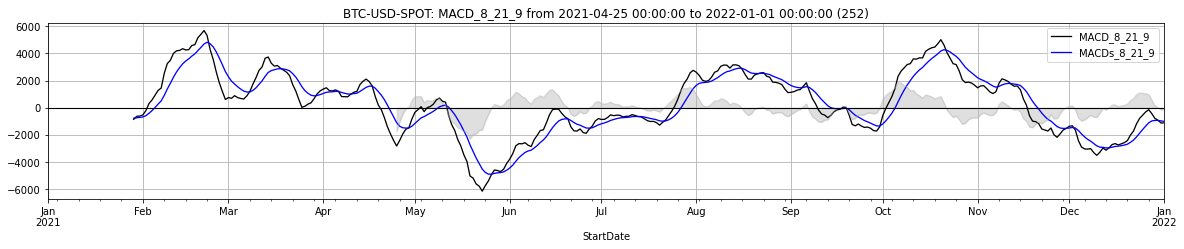

In [19]:
fig = go.Figure(data=[go.Candlestick(x=hddf.index,
                open=hddf['Open'],
                high=hddf['High'],
                low=hddf['Low'],
                close=hddf['Close'])])

fig.show()


def ctitle(indicator_name, ticker="SPY", length=100):
    return f"{ticker}: {indicator_name} from {recent_startdate} to {recent_enddate} ({length})"

def recent_bars(df, tf: str = "1y"):
    # All Data: 0, Last Four Years: 0.25, Last Two Years: 0.5, This Year: 1, Last Half Year: 2, Last Quarter: 4
    yearly_divisor = {"all": 0, "10y": 0.1, "5y": 0.2, "4y": 0.25, "3y": 1./3, "2y": 0.5, "1y": 1, "6mo": 2, "3mo": 4}
    yd = yearly_divisor[tf] if tf in yearly_divisor.keys() else 0
    return int(ta.RATE["TRADING_DAYS_PER_YEAR"] / yd) if yd > 0 else df.shape[0]

recent_startdate = hddf.tail(recent_bars(hddf)).index[0]
recent_enddate = hddf.tail(recent_bars(hddf)).index[-1]

ind_size = (20, 3.25)

macddf = hddf.ta.macd(fast=8, slow=21, signal=9, min_periods=None, append=True)

macddf[[macddf.columns[0], macddf.columns[2]]].tail(recent_bars(macddf,".5")).plot(figsize=ind_size, color=colors("BkBl"), linewidth=1.3)
macddf[macddf.columns[1]].tail(recent_bars(macddf)).plot.area(figsize=ind_size, stacked=False, color=["silver"], linewidth=1, title=ctitle(macddf.name, ticker=asset.ticker, length=recent_bars(macddf)), grid=True).axhline(y=0, color="black", lw=1.1)



## Configure Judge Research Feature Parameters
Set the constants & default values below as appropriate.

In [20]:
# ATTRIBUTE - a string representing the time block of the observation,
# in coordinated universal time following the ISO 8601 standard, in UTC.
# The attribute should be structured as "YYYY-MM-DDTHH:MM:SSZ". For
# the alpha test, if you mistakenly send in objects with a date prior to
# "2019-01-01T00:00:00Z", you won’t receive an error message but earlier observations will be discarded.
jrparams.attribute = "2022-01-01T00:00:00Z"

# DV - a string specifying the dependent variable. Choices during the alpha test are "ETH-USD", 
# "BTC-USD", and "V-BTC-USD", which denotes the volatility of BTC-USD.
jrparams.dv = "ETH-USD"

# MBS - a string specifying the block size of the observation, in minutes. 
# This can be any positive number. For the alpha test, we are currently set to test four hour series,
# so 240 should be the value you set. We will likely include another time frame for the alpha test, 
# and will update this document when we do.
jrparams.mbs = "240"

# FEATURE_NAME - an alphanumeric string for the name of the feature, of length no more than 50 characters. 
# You can name the feature whatever you want.
jrparams.feature_name = "testfeature001"

# VALUE - the most important part! A string with the value of the feature, also of length no more than 50 characters.
# The default value is set here, the feature_gen function will set this variable when generating new feature data.
jrparams.value = "0"    # default value

# IPP - optional, defaults to "last" - what type of interpolation procedure is appropriate for your feature. 
# Values can be either "last" - fill in the missing value with the last observed value - and "zero" - fill in 
# the last value with a 0.
jrparams.ipp = "last"    # default value

## Submit Historical Feature Data

In [21]:
# Connect to Judge Research with API key, craft payload, and submit feature data

features = []
features.append(jrparams)

# Configure API key
JR.with_api_key(JR_API_KEY)

# Craft payload
payload = JR.format_payload(features)

# Submit feature data
s = JR.submit_feature(payload)

print(s.text)

{"message":}


## Scheduling and Headless Execution
The feature_gen function can be run periodically from this notebook or exported for use in a self-contained docker runtime environment.  Running the feature generation locally, in this notebook, is appropriate for reasearch and testing; however, the notebook UI adds a layer of complexity which may be undesirable in production.

### Scheduling inside this notebook
instuctions here for python cron stuff...

### Scheduling a headless docker runtime 
instuctions for running the feature_gen code in a self-sufficient docker container..